In [59]:
import pandas as pd
#import io
#import requests
#from colorspacious import cspace_converter
#from collections import OrderedDict
#from sklearn.model_selection import train_test_split
import seaborn as sns
#import plotly
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# import pandas_profiling


#cmaps = OrderedDict()
%matplotlib inline

In [60]:
# from numpy.random import randn
# #import pandas as np
# import numpy as np

In [61]:
df_2 = pd.read_csv('../data.csv',thousands=',')
venture_capital_15= pd.read_csv('../venture_capital_2015.csv')
industry_growth=pd.read_csv('../industry_growth_2018.csv')

Get rid of punctuations,drop unwanted columns,change column names to lowercase

Categorize Data,Dummy sharks investments

In [62]:
df_2

,Row,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Valuation,...,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,# Sharks,$ per shark,Details / Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,"$90,909",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"$50,000",NaN
2,3.0,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,"$920,000",...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,"$230,000",NaN
3,4.0,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,5.0,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5,6.0,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6,7.0,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,"$500,000",50%,"$1,000,000",...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,"$250,000",NaN
7,8.0,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,"$250,000",10%,"$2,500,000",...,1.0,NaN,1.0,1.0,1.0,NaN,NaN,5.0,"$50,000",NaN
8,9.0,1.0,2.0,Lifebelt,No,Consumer Products,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
9,10.0,1.0,2.0,Crooked Jaw,No,Fashion / Beauty,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [67]:
df_2.loc[df_2['Industry']=='Uncertain / Other'].head()

,Row,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Valuation,...,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,# Sharks,$ per shark,Details / Notes
5,6.0,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
43,44.0,1.0,10.0,The URO Club,Yes,Uncertain / Other,Male,"$25,000",70%,"$35,714",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"$25,000",NaN
44,45.0,1.0,10.0,Jump Forward,Yes,Uncertain / Other,Male,"$600,000",50%,"$1,200,000",...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,"$300,000",NaN
93,94.0,2.0,8.0,HyConn,Yes,Uncertain / Other,Male,"$1,250,000",100%,"$1,250,000",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"$1,250,000",deal did not go through after show
152,153.0,3.0,13.0,Skyride,No,Uncertain / Other,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [68]:
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [69]:
df_2['equity'] = df_2["equity"].str.strip("%")

In [70]:
df_2 = df_2.rename(columns={'entrepreneur_gender':'gender'})

In [71]:
cols_to_drop =['row','no._in_series','#_sharks','$_per_shark', 'details_/_notes','company']
df_2 = df_2.drop(cols_to_drop,axis=1)

In [72]:
df_2.head()

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,o'leary,harrington,guest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Yes,Healthcare,Female,"$50,000",55,"$90,909",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Yes,Food and Beverage,Male,"$460,000",50,"$920,000",1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1.0,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_2['amount'] = df_2['amount'].str.replace(',', '')
df_2['amount'] = df_2['amount'].str.replace('$', '')
df_2['valuation'] = df_2['valuation'].str.replace(',', '')
df_2['valuation'] = df_2['valuation'].str.replace('$', '')

In [74]:
df_2['industry']= df_2['industry'].str.replace('/', '').str.replace(' ', '')

In [75]:
df_2.columns = df_2.columns.str.replace(r"[\"\',]", '')

In [76]:
df_2.head()

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Yes,Healthcare,Female,50000,55,90909,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Yes,FoodandBeverage,Male,460000,50,920000,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1.0,No,BusinessServices,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,No,LifestyleHome,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_2=df_2.drop(df_2.index[[0]])

In [78]:
df_2=df_2.fillna(value=0)

In [79]:
df_2.loc[df_2['industry']=='GreenCleanTech']

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest
64,1.0,No,GreenCleanTech,Mixed Team,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,2.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,3.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,4.0,No,GreenCleanTech,Male,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,5.0,Yes,GreenCleanTech,Male,150000,20,750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,5.0,Yes,GreenCleanTech,Male,400000,17,2352941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
479,6.0,Yes,GreenCleanTech,Male,600000,35,1714286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
484,6.0,Yes,GreenCleanTech,Male,5000000,50,10000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
494,6.0,Yes,GreenCleanTech,Male,300000,20,1500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
import re

In [83]:
df_2.industry = df_2.industry.apply(lambda x: re.sub("([a-z])([A-Z])","\g<1> \g<2>", str(x))) 

In [85]:
col = ['valuation','amount','equity','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']

In [86]:
for cols in col:
    df_2[cols]= pd.to_numeric(df_2[cols])

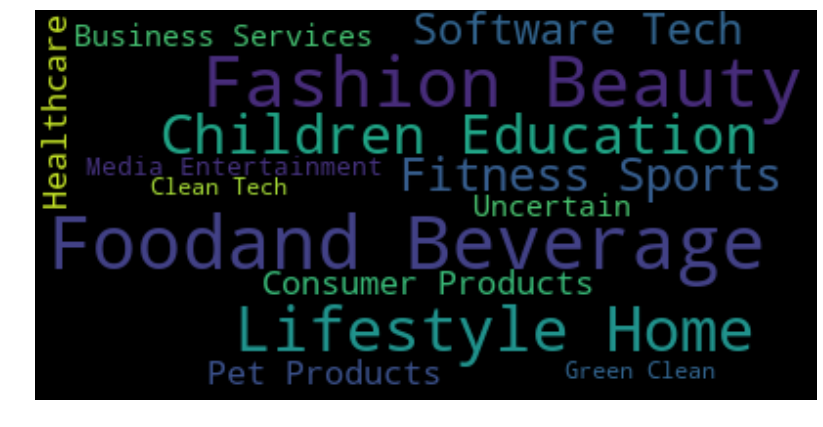

In [87]:
#from PIL import Image
from wordcloud import WordCloud
%matplotlib inline





wordcloud2 = WordCloud().generate(' '.join(df_2['industry']))
plt.figure(figsize = (14,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Investments by Gender 

In [88]:
wins_df = df_2[df_2['deal']!= 'No' ]

In [89]:
GENDER=pd.DataFrame(df_2.groupby('gender')['deal'].count().sort_values(ascending=False))

In [90]:
GENDER_WINS=pd.DataFrame(wins_df.groupby('gender')['deal'].count().sort_values(ascending=False))

In [91]:
GENDER_DF=pd.merge(GENDER,GENDER_WINS,on='gender')

In [92]:
GENDER_DF.columns=['contestants','funded']

In [93]:
GENDER_DF

,contestants,funded
gender,,
Male,295,142
Female,125,67
Mixed Team,75,40


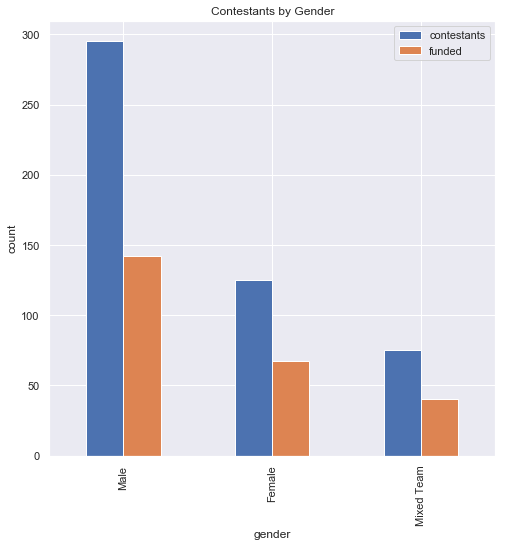

In [94]:
GENDER_DF.plot(kind='bar',figsize=(8,8))
plt.title('Contestants by Gender')
plt.ylabel('count');

# Pitches that got funded

In [95]:
season_deals = wins_df.groupby(['season'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

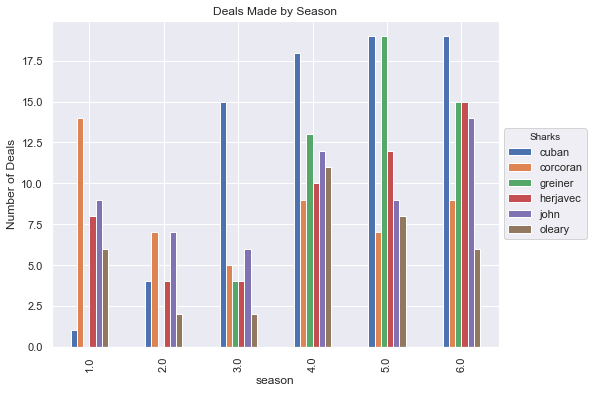

In [96]:
season_deals.plot(kind='bar',figsize=(8,6))
plt.ylabel('Number of Deals')
plt.title('Deals Made by Season')
plt.legend(season_deals, title="Sharks", loc="center left", bbox_to_anchor=(1, 0, 1, 1));

In [97]:
season_1=wins_df.loc[wins_df['season'] == 1]

In [98]:
wins_df.groupby(['season'])['deal'].count()

season
1.0    27
2.0    19
3.0    28
4.0    52
5.0    57
6.0    66
Name: deal, dtype: int64

In [99]:
season_1=season_1.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

<h3 style = "color: purple;" >These plots need a titles!</h3>

In [32]:
#season_1 = season_1[season_1!= 0 ]

In [33]:
season_1

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
ChildrenEducation,1.0,3.0,0.0,1.0,2.0,1.0
ConsumerProducts,0.0,0.0,0.0,0.0,1.0,0.0
FashionBeauty,0.0,2.0,0.0,1.0,3.0,0.0
FitnessSports,0.0,1.0,0.0,0.0,0.0,0.0
FoodandBeverage,0.0,4.0,0.0,2.0,2.0,2.0
Healthcare,0.0,1.0,0.0,1.0,0.0,1.0
LifestyleHome,0.0,1.0,0.0,1.0,0.0,0.0
PetProducts,0.0,1.0,0.0,0.0,1.0,0.0
SoftwareTech,0.0,1.0,0.0,1.0,0.0,1.0


Text(0.5, 1.0, 'Season 1 Sharks Investments by Industry')

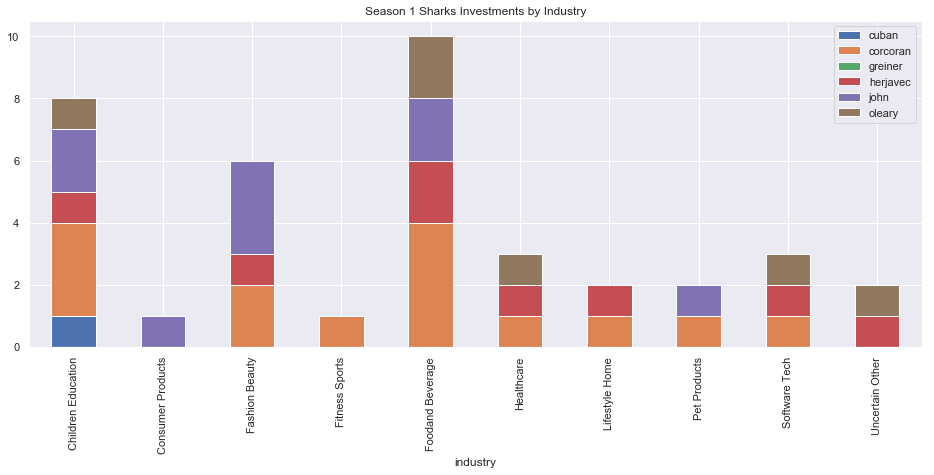

In [100]:
season_1.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 1 Sharks Investments by Industry')

In [101]:
season_1=wins_df.loc[wins_df['season'] == 1]

In [102]:
season_1=season_1.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

Text(0.5, 1.0, 'Season 3 Number ofSharks Investments by Industry')

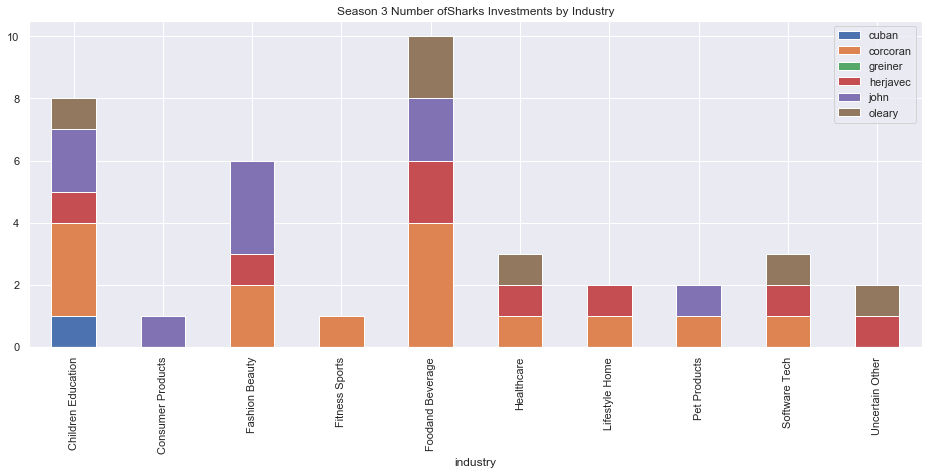

In [103]:
season_1.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 3 Number ofSharks Investments by Industry')

In [104]:
season_1

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
Children Education,1.0,3.0,0.0,1.0,2.0,1.0
Consumer Products,0.0,0.0,0.0,0.0,1.0,0.0
Fashion Beauty,0.0,2.0,0.0,1.0,3.0,0.0
Fitness Sports,0.0,1.0,0.0,0.0,0.0,0.0
Foodand Beverage,0.0,4.0,0.0,2.0,2.0,2.0
Healthcare,0.0,1.0,0.0,1.0,0.0,1.0
Lifestyle Home,0.0,1.0,0.0,1.0,0.0,0.0
Pet Products,0.0,1.0,0.0,0.0,1.0,0.0
Software Tech,0.0,1.0,0.0,1.0,0.0,1.0


In [105]:
wins_df.loc[wins_df['industry']=='UncertainOther']

,season,deal,industry,gender,amount,equity,valuation,corcoran,cuban,greiner,herjavec,john,oleary,harrington,guest


In [106]:
season_6=wins_df.loc[wins_df['season'] == 6]

In [107]:
season_6=season_6.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

Text(0.5, 1.0, 'Season 6 Number of Sharks Investments by Industry')

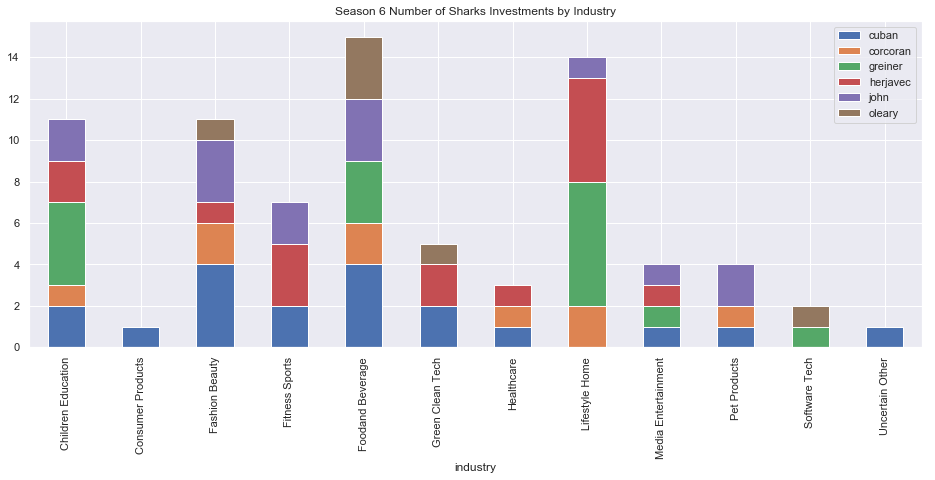

In [108]:
season_6.plot(kind='bar',figsize=(16,6),stacked=True)
plt.title('Season 6 Number of Sharks Investments by Industry')

In [109]:
industry_valuation=wins_df.groupby('industry', as_index=False)[['amount','valuation']].mean()

In [110]:
industry_valuation=industry_valuation.rename(columns={'amount':'avg_amount','valuation':'avg_valuation'})

In [111]:
industry_valuation['avg_amount']=industry_valuation['avg_amount'].map('{:,.2f}'.format)
industry_valuation['avg_valuation']=industry_valuation['avg_valuation'].map('{:,.2f}'.format)

In [112]:
industry_valuation.style.highlight_max()

,industry,avg_amount,avg_valuation
0,Business Services,"225,000.00","800,000.00"
1,Children Education,"137,413.79","851,671.86"
2,Consumer Products,"211,000.00","718,747.90"
3,Fashion Beauty,"206,860.47","847,519.98"
4,Fitness Sports,"305,869.57","1,283,666.91"
5,Foodand Beverage,"242,589.29","1,369,139.54"
6,Green Clean Tech,"1,290,000.00","3,263,445.40"
7,Healthcare,"538,000.00","1,990,193.80"
8,Lifestyle Home,"181,081.08","956,306.35"
9,Media Entertainment,"666,666.67","5,377,976.17"


In [411]:
# industry_valuation.style.apply(highlight, axis=1)

In [458]:
industry_avg=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

In [459]:
industry_avg['cuban'] = (industry_avg.cuban * 100 / industry_avg.cuban.sum()).round(1).astype(str)+ '%' 
industry_avg['corcoran'] = (industry_avg.corcoran * 100 / industry_avg.corcoran.sum()).round(1).astype(str)+ '%'
industry_avg['greiner'] = (industry_avg.greiner * 100 / industry_avg.greiner.sum()).round(1).astype(str)+ '%'
industry_avg['herjavec'] = (industry_avg.herjavec * 100 / industry_avg.herjavec.sum()).round(1).astype(str)+ '%'
industry_avg['john'] = (industry_avg.john * 100 / industry_avg.john.sum()).round(1).astype(str)+ '%'
industry_avg['oleary'] = (industry_avg.oleary * 100 / industry_avg.oleary.sum()).round(1).astype(str)+ '%'

In [460]:
industry_avg.style.highlight_max()

,cuban,corcoran,greiner,herjavec,john,oleary
industry,,,,,,
BusinessServices,1.3%,0.0%,0.0%,1.9%,0.0%,8.6%
ChildrenEducation,10.5%,9.8%,15.7%,13.2%,10.5%,11.4%
ConsumerProducts,2.6%,5.9%,3.9%,3.8%,7.0%,0.0%
FashionBeauty,17.1%,17.6%,15.7%,15.1%,28.1%,5.7%
FitnessSports,13.2%,7.8%,0.0%,13.2%,8.8%,2.9%
FoodandBeverage,25.0%,33.3%,15.7%,13.2%,15.8%,31.4%
GreenCleanTech,2.6%,0.0%,2.0%,3.8%,0.0%,2.9%
Healthcare,5.3%,5.9%,3.9%,7.5%,3.5%,8.6%
LifestyleHome,5.3%,9.8%,33.3%,17.0%,12.3%,8.6%


In [329]:
#industry_avg=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

# AVG VALUATION AND DEAL SIZE BY SEASON

In [113]:
df_2.groupby('season', as_index=False)[['deal','amount','valuation']].mean()

,season,amount,valuation
0,1.0,76406.250000,1.938206e+05
1,2.0,110555.555556,2.807209e+05
2,3.0,80916.666667,2.651637e+05
3,4.0,92174.757282,3.616415e+05
4,5.0,134655.172414,7.104252e+05
5,6.0,226250.000000,1.274218e+06


In [114]:
season_avg = wins_df.groupby('season', as_index=False)[['amount','valuation']].mean()

In [115]:
season_avg['amount']=season_avg['amount'].map('{:,.2f}'.format)
season_avg['valuation']=season_avg['valuation'].map('{:,.2f}'.format)

In [116]:
season_avg.columns

Index(['season', 'amount', 'valuation'], dtype='object')

In [117]:
season_avg=season_avg.rename(columns={'amount':'avg_amount','valuation':'avg_valuation'})

In [118]:
season_avg

,season,avg_amount,avg_valuation
0,1.0,"181,111.11","459,426.52"
1,2.0,"209,473.68","531,892.21"
2,3.0,"173,392.86","568,207.82"
3,4.0,"182,576.92","716,328.38"
4,5.0,"274,035.09","1,445,777.61"
5,6.0,"397,651.52","2,239,535.32"


In [119]:
equity_deals = wins_df.groupby(['equity'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

# Sharks investment percenatges by Gender

In [120]:
gender=wins_df.groupby('gender')['corcoran', 'cuban', 'greiner',
       'herjavec', 'john', 'oleary'].sum()

In [121]:
gender = gender.T

In [122]:
gender['Total']=gender['Female']+gender['Male']+gender['Mixed Team']

In [123]:
gender

gender,Female,Male,Mixed Team,Total
corcoran,24.0,19.0,8.0,51.0
cuban,20.0,43.0,13.0,76.0
greiner,15.0,27.0,9.0,51.0
herjavec,7.0,39.0,7.0,53.0
john,15.0,34.0,8.0,57.0
oleary,7.0,22.0,6.0,35.0


In [124]:
gender['female_percentile']= gender['Female']/gender['Total']*100
gender['male_percentile']= gender['Male']/gender['Total']*100
gender['mixed_team_perentile']= gender['Mixed Team']/gender['Total']*100

In [125]:
columns_to_drop=['Female', 'Male', 'Mixed Team','Total','mixed_team_perentile']
gender= gender.drop(columns_to_drop,axis=1)

In [126]:
gender

gender,female_percentile,male_percentile
corcoran,47.058824,37.254902
cuban,26.315789,56.578947
greiner,29.411765,52.941176
herjavec,13.207547,73.584906
john,26.315789,59.649123
oleary,20.000000,62.857143


In [127]:
gender = gender.rename(columns={'female_percentile': 'female', 'male_percentile': 'male'})

<h3 style = "color: purple;" > Labels need some work here. Your legend title shouldn't have an underscore, and you can just say female and male in the key. I think a stacked bar (since all bars will total to 100%) may make more sense here. I think you can drop the ylabel and make the title more clear...something like Percentage of Deals By Gender...</h3>

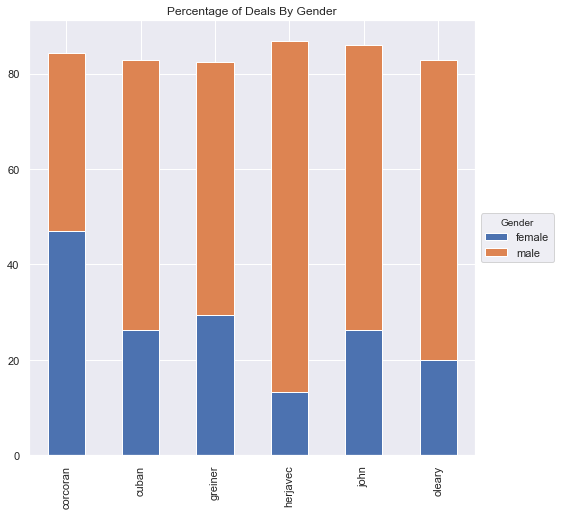

In [128]:
gender.plot(kind='bar',figsize=(8,8),stacked=True)
plt.legend(gender, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Deals By Gender');

In [129]:
gender_industry=wins_df.groupby(['industry','gender']).size().unstack(level=1, fill_value=0)

In [130]:
gender_industry=gender_industry.rename(columns={'Mixed Team':'MixedTeam'})

In [131]:
gender_industry['Female'] = (gender_industry.Female * 100 / gender_industry.Female.sum()).round(1).astype(str) + '%'
gender_industry['Male'] = (gender_industry.Male * 100 / gender_industry.Male.sum()).round(1).astype(str) + '%'
gender_industry['MixedTeam'] = (gender_industry.MixedTeam * 100 / gender_industry.MixedTeam.sum()).round(1).astype(str) + '%'


In [132]:
gender_industry

gender,Female,Male,MixedTeam
industry,,,
Business Services,0.0%,1.4%,2.5%
Children Education,20.9%,6.3%,15.0%
Consumer Products,1.5%,4.2%,7.5%
Fashion Beauty,26.9%,13.4%,15.0%
Fitness Sports,6.0%,12.7%,2.5%
Foodand Beverage,22.4%,21.1%,27.5%
Green Clean Tech,0.0%,3.5%,0.0%
Healthcare,3.0%,4.9%,2.5%
Lifestyle Home,9.0%,16.9%,17.5%


In [133]:
valuation_avg = wins_df.groupby('amount','valuation', as_index=False)[['cuban','corcoran','greiner','herjavec','john','oleary']].mean()

ValueError: No axis named valuation for object type <class 'type'>

# Categorizing pitches made by industry

Text(0.5, 0, 'count')

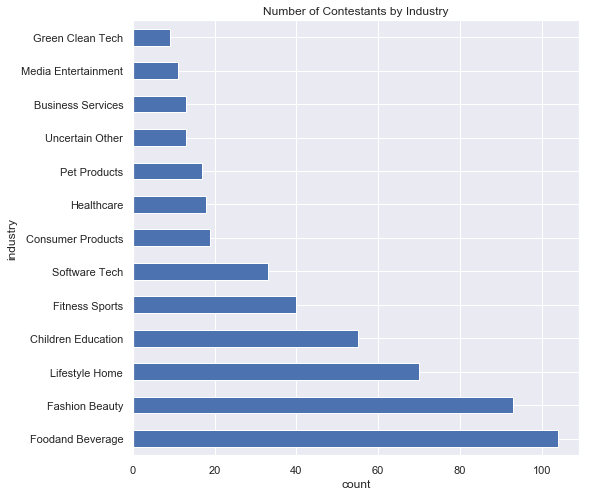

In [134]:
df_2.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(8,8))
plt.title('Number of Contestants by Industry')
plt.xlabel('count')

# Ranking Pitches that got funded by industry 

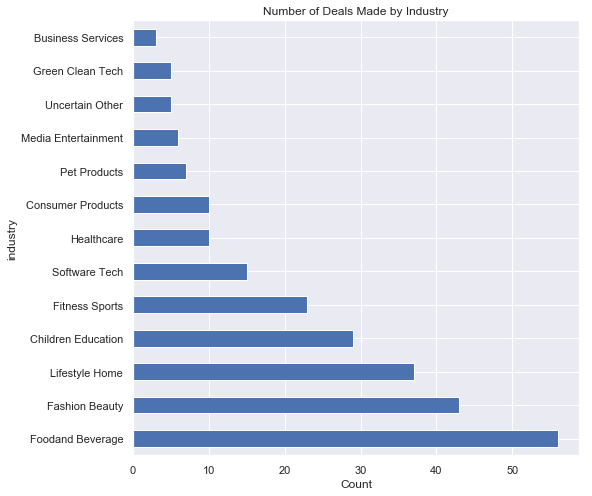

In [135]:
wins_df.groupby('industry')['deal'].count().sort_values(ascending=False).plot(kind='barh',figsize=(8,8))
plt.title('Number of Deals Made by Industry')
plt.xlabel('Count');

# Venture Capital Investments 2015

In [136]:
venture_columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
venture_capital_15=venture_capital_15.drop(venture_columns,axis=1)

In [137]:
df_2.industry.value_counts()

Foodand Beverage       104
Fashion Beauty          93
Lifestyle Home          70
Children Education      55
Fitness Sports          40
Software Tech           33
Consumer Products       19
Healthcare              18
Pet Products            17
Business Services       13
Uncertain Other         13
Media Entertainment     11
Green Clean Tech         9
Name: industry, dtype: int64

<h3 style = "color: purple;" >Needs a title </h3>

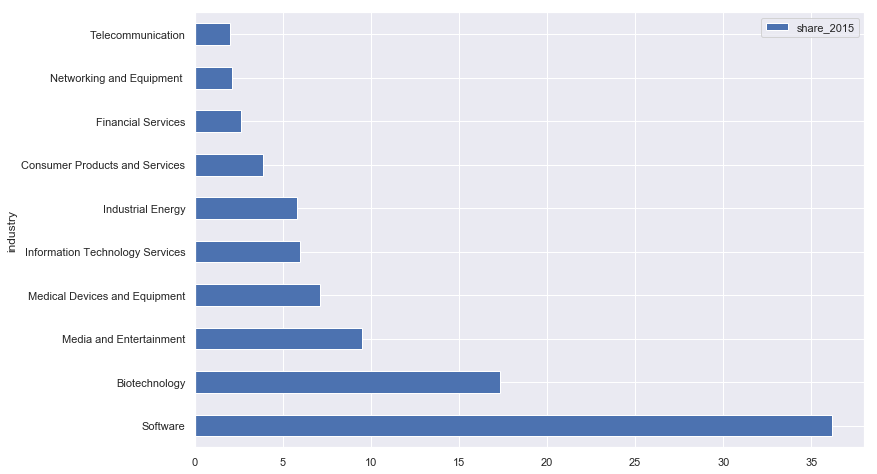

In [138]:
venture_capital_15.plot(kind='barh',x='industry',figsize=(12,8));

# Industry Statistics & Market Size 2018

<h3 style = "color: purple;" >Are you comfortable interpreting this plot? Is it saying thatrevenue growth and employment growth in the minig industry were negative? What are forecast revenue and forecast employment and and why are they so big for mining? Does it say actual growth was greates for food and services, informations and construction?</h3>

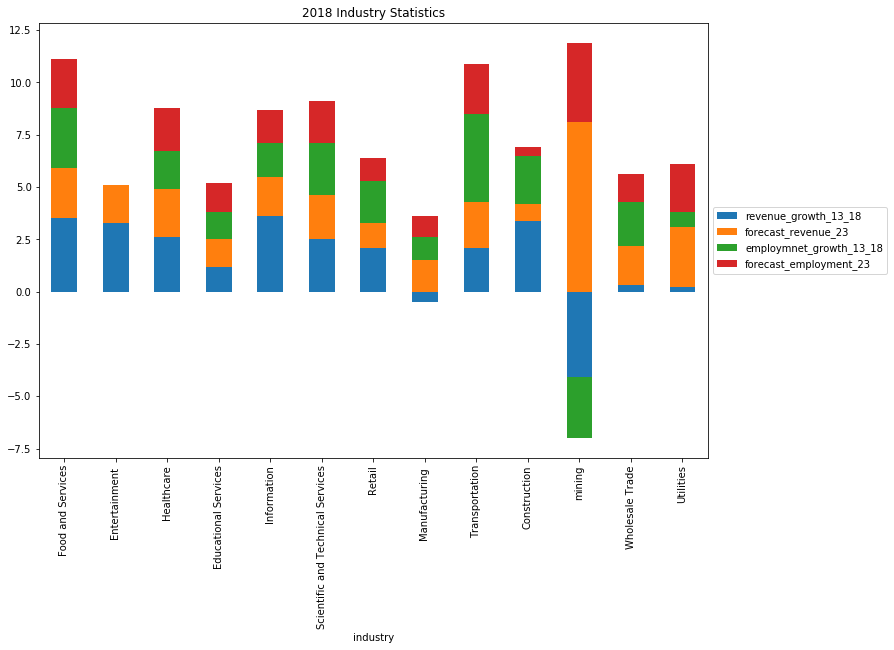

In [355]:
industry_growth.plot(kind='bar',x='industry',stacked=True,figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('2018 Industry Statistics');

In [356]:
col = ['valuation','amount','equity','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']


In [357]:
investor_cols =['amount','cuban','corcoran','greiner','herjavec','john','oleary','harrington','guest']

In [358]:
for cols in col:
    df_2[cols]= pd.to_numeric(df_2[cols])

In [359]:
for cols in col:
    wins_df[cols]= pd.to_numeric(wins_df[cols])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# AVG VALUATION AND AMOUNT INVESTED BY GENDER

In [363]:
valuation_avg = wins_df.groupby('gender', as_index=False)[['amount','valuation']].mean()

In [364]:
valuation_avg['amount']=valuation_avg['amount'].map('{:,.2f}'.format)

In [365]:
valuation_avg['valuation']=valuation_avg['valuation'].map('{:,.2f}'.format)

In [367]:
valuation_avg=valuation_avg.rename(columns={'amount':'avg_amount','valuation':'avg_valuation'})

In [368]:
valuation_avg

,gender,avg_amount,avg_valuation
0,Female,"170,373.13","749,137.09"
1,Male,"312,669.01","1,510,316.45"
2,Mixed Team,"231,750.00","1,030,772.43"


In [ ]:
#big_money_deals['amount']=big_money_deals['amount'].map('{:,.2f}'.format)

In [ ]:
#big_money_deals=big_money_deals.loc[:, (big_money_deals != 0).any(axis=0)]

# Sharks investments by industry

In [39]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
# plt.figure(figsize = (12,10))

# sns.heatmap(corrs,cmap='coolwarm', annot=True)
# # Decorations
# plt.title('Investors & Industries', fontsize=22)
# plt.xlabel('Sharks')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [49]:
investor_wins=wins_df.groupby(['industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].corr()

In [50]:
investor_wins

cuban  corcoran   greiner      herjavec  \
industry                                                                  
BusinessServices   cuban     1.000000       NaN       NaN  1.000000e+00   
                   corcoran       NaN       NaN       NaN           NaN   
                   greiner        NaN       NaN       NaN           NaN   
                   herjavec  1.000000       NaN       NaN  1.000000e+00   
                   john           NaN       NaN       NaN           NaN   
                   oleary         NaN       NaN       NaN           NaN   
ChildrenEducation  cuban     1.000000 -0.077472 -0.208333  1.243412e-02   
                   corcoran -0.077472  1.000000 -0.281718 -4.413674e-02   
                   greiner  -0.208333 -0.281718  1.000000 -1.678606e-01   
                   herjavec  0.012434 -0.044137 -0.167861  1.000000e+00   
                   john     -0.124784 -0.007771 -0.315244 -8.917507e-02   
                   oleary    0.200594  0.082158 -0.023146  2.417469e-01   
ConsumerProducts   cuban     1.000000 -0.327327 -0.250000  3.750000e-01   
                   corcoran -0.327327  1.000000 -0.327327 -3.273268e-01   
                   greiner  -0.250000 -0.327327  1.000000 -2.500000e-01   
                   herjavec  0.375000 -0.327327 -0.250000  1.000000e+00   
                   john     -0.408248 -0.089087 -0.408248  1.020621e-01   
                   oleary         NaN       NaN       NaN           NaN   
FashionBeauty      cuban     1.000000 -0.214209  0.075653 -5.447048e-02   
                   corcoran -0.214209  1.000000 -0.099074 -2.459760e-01   
                   greiner   0.075653 -0.099074  1.000000 -7.500000e-02   
                   herjavec -0.054470 -0.245976 -0.075000  1.000000e+00   
                   john     -0.192466 -0.159524 -0.368035 -2.443982e-01   
                   oleary   -0.145390  0.157824 -0.105593  1.781877e-01   
FitnessSports      cuban     1.000000  0.291756       NaN -3.895087e-01   
                   corcoran  0.291756  1.000000       NaN -3.034885e-01   
                   greiner        NaN       NaN       NaN           NaN   
                   herjavec -0.389509 -0.303488       NaN  1.000000e+00   
                   john     -0.249615 -0.241825       NaN -3.486083e-01   
                   oleary   -0.186989 -0.097823       NaN  3.223292e-01   
...                               ...       ...       ...           ...   
LifestyleHome      cuban     1.000000  0.116977 -0.146331  5.482931e-03   
                   corcoran  0.116977  1.000000 -0.364434  1.444235e-01   
                   greiner  -0.146331 -0.364434  1.000000 -3.962947e-01   
                   herjavec  0.005483  0.144423 -0.396295  1.000000e+00   
                   john      0.054056  0.010911 -0.445346 -1.130221e-01   
                   oleary    0.215453  0.461840 -0.075178  6.237343e-02   
MediaEntertainment cuban     1.000000       NaN -0.632456 -1.000000e+00   
                   corcoran       NaN       NaN       NaN           NaN   
                   greiner  -0.632456       NaN  1.000000  6.324555e-01   
                   herjavec -1.000000       NaN  0.632456  1.000000e+00   
                   john      0.500000       NaN -0.316228 -5.000000e-01   
                   oleary         NaN       NaN       NaN           NaN   
PetProducts        cuban     1.000000  0.471405 -0.166667           NaN   
                   corcoran  0.471405  1.000000 -0.353553           NaN   
                   greiner  -0.166667 -0.353553  1.000000           NaN   
                   herjavec       NaN       NaN       NaN           NaN   
                   john     -0.471405 -0.416667  0.353553           NaN   
                   oleary         NaN       NaN       NaN           NaN   
SoftwareTech       cuban     1.000000  0.080064 -0.068041 -4.082483e-01   
                   corcoran  0.080064  1.000000 -0.196116 -1.961161e-01   
                   greiner  -0.068041 -0.196116  1.000000

In [52]:
investor_wins = investor_wins.drop(['season', 'amount', 'equity', 'valuation','guest'], axis=1)

KeyError: "['season' 'amount' 'equity' 'valuation' 'guest'] not found in axis"

In [55]:
investor_wins=investor_wins.fillna(value=0)

# Industry Vs Investor Buy Ins

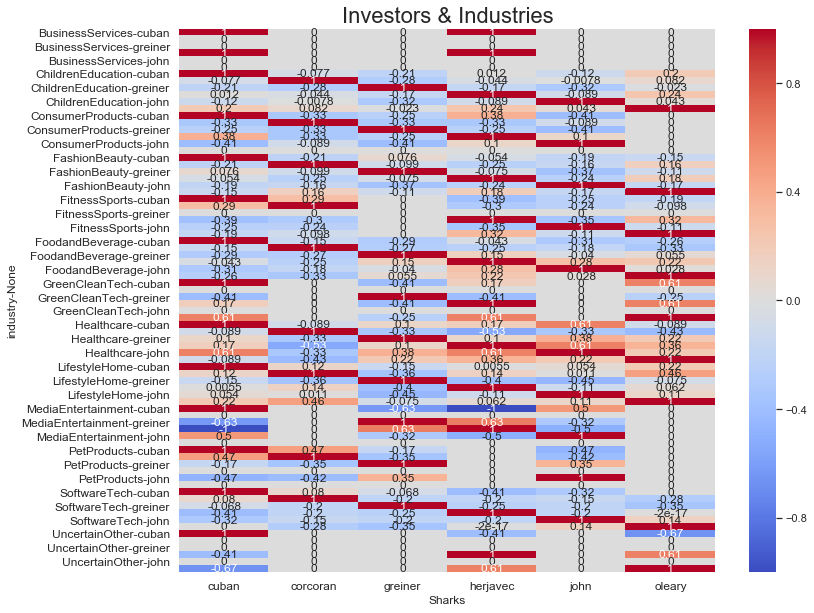

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1)
plt.figure(figsize = (12,10))

sns.heatmap(investor_wins,cmap='coolwarm', annot=True)
# Decorations
plt.title('Investors & Industries', fontsize=22)
plt.xlabel('Sharks')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Asking Amount and Equity

In [ ]:
amount_equity_df=pd.DataFrame(wins_df[['amount','equity','valuation']])

<h3 style = "color: purple;" >Title? What does this plot tell you? WHat is amount? amount of what? Is that the shark's investment? </h3>

In [ ]:
amount_equity_df.valuation.mode()

In [ ]:
amount_equity_df.equity.count()

In [ ]:
amount_equity_df.loc[amount_equity_df['equity'] <= 50].count()

In [ ]:
amount_equity_df.loc[amount_equity_df['equity'] >= 50].count()

In [ ]:
amount_equity_df.loc[amount_equity_df['equity'] == ]

In [ ]:
amount_equity_df.plot(kind='scatter',x='valuation',y='amount',c='equity',figsize=(12,8))
plt.title('Equity & Funds Asked')

In [ ]:
amount_equity_df

# Equity and Valuation 

In [ ]:
wins_df['deal'].value_counts()

# Largest investmnets made by sharks 

In [503]:




money_deals =pd.DataFrame(wins_df.groupby(['amount','industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [504]:
money_deals=money_deals.reset_index()

In [505]:
big_money_deals=money_deals.loc[money_deals['amount'] > 500000]

In [506]:
big_money_deals['amount']=big_money_deals['amount'].map('{:,.2f}'.format)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [507]:
#big_money_deals=big_money_deals.loc[:, (big_money_deals != 0).any(axis=0)]

In [508]:
big_money_deals

,amount,industry,cuban,corcoran,greiner,herjavec,john,oleary
108,"600,000.00",FoodandBeverage,1.0,1.0,0.0,0.0,0.0,0.0
109,"600,000.00",GreenCleanTech,1.0,0.0,0.0,1.0,0.0,1.0
110,"600,000.00",UncertainOther,0.0,0.0,0.0,1.0,0.0,1.0
111,"650,000.00",MediaEntertainment,1.0,0.0,0.0,0.0,1.0,0.0
112,"725,000.00",MediaEntertainment,0.0,0.0,1.0,1.0,0.0,0.0
113,"750,000.00",Healthcare,1.0,0.0,0.0,1.0,1.0,0.0
114,"750,000.00",LifestyleHome,0.0,0.0,0.0,1.0,0.0,0.0
115,"1,000,000.00",FoodandBeverage,1.0,0.0,0.0,0.0,0.0,1.0
116,"1,000,000.00",Healthcare,1.0,0.0,1.0,1.0,1.0,1.0
117,"1,200,000.00",FashionBeauty,1.0,0.0,0.0,1.0,0.0,0.0


In [509]:
# plt.figure(1)   #creating empty figure

# #big_money_deals.set_index('amount', inplace=True) #set index from column ingredient

# fig_contr = big_money_deals['industry'] #selecting columns
# fig_count = big_money_deals[['cuban','corcoran','greiner','herjavec','john','oleary']]

# plt.subplot(211)  #creating subplot
# fig_contr.plot.bar(stacked=True)  #plotting subplot
# plt.subplot(212)
# fig_count.plot.bar(stacked=True)
# plt.show()

In [518]:
plt.figure(1) 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [520]:
big_money_deals

,amount,industry,cuban,corcoran,greiner,herjavec,john,oleary
108,"600,000.00",FoodandBeverage,1.0,1.0,0.0,0.0,0.0,0.0
109,"600,000.00",GreenCleanTech,1.0,0.0,0.0,1.0,0.0,1.0
110,"600,000.00",UncertainOther,0.0,0.0,0.0,1.0,0.0,1.0
111,"650,000.00",MediaEntertainment,1.0,0.0,0.0,0.0,1.0,0.0
112,"725,000.00",MediaEntertainment,0.0,0.0,1.0,1.0,0.0,0.0
113,"750,000.00",Healthcare,1.0,0.0,0.0,1.0,1.0,0.0
114,"750,000.00",LifestyleHome,0.0,0.0,0.0,1.0,0.0,0.0
115,"1,000,000.00",FoodandBeverage,1.0,0.0,0.0,0.0,0.0,1.0
116,"1,000,000.00",Healthcare,1.0,0.0,1.0,1.0,1.0,1.0
117,"1,200,000.00",FashionBeauty,1.0,0.0,0.0,1.0,0.0,0.0


In [519]:
big_money_deals.set_index([['cuban','corcoran','greiner','herjavec','john','oleary']], inplace=True) #set index from column ingredient


ValueError: Length mismatch: Expected axis has 16 elements, new values have 6 elements

In [516]:
plt.figure(1)   #creating empty figure

big_money_deals.set_index([['cuban','corcoran','greiner','herjavec','john','oleary']], inplace=True) #set index from column ingredient

fig_contr = big_money_deals['amount'] #selecting columns
fig_count = big_money_deals[['industry']

plt.subplot()  #creating subplot
fig_contr.plot.bar(stacked=True)  #plotting subplot
plt.subplot()
fig_count.plot.bar(stacked=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-516-44a596a08b6a>, line 8)

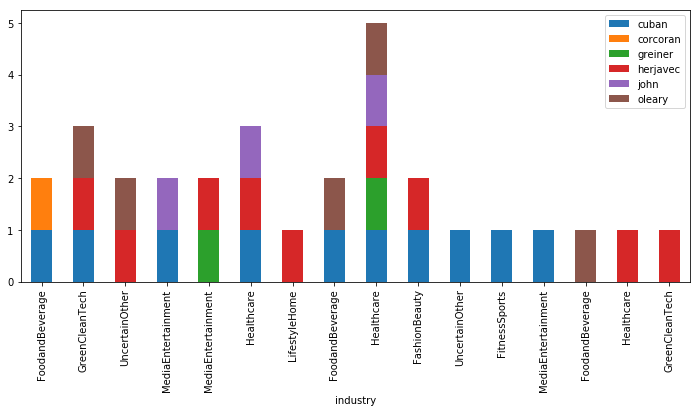

In [511]:
big_money_deals.plot(x='industry',kind='bar',stacked=True,figsize=(12,5))

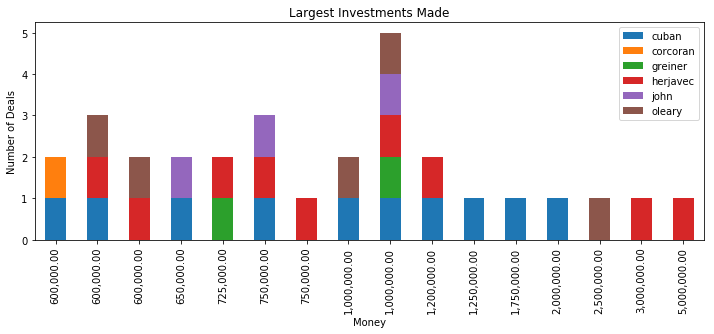

In [522]:
big_money_deals.plot(x='amount',kind='bar',stacked=True,figsize=(12,4))
plt.title('Largest Investments Made')
plt.ylabel('Number of Deals')
plt.xlabel('Money');

# Equity and Valuation For Largest Investments

In [ ]:
gm_df=pd.DataFrame(wins_df.groupby(['amount'])[['equity','valuation','cuban','corcoran','greiner','herjavec','john','oleary']].sum())

In [ ]:
gm_df=gm_df.reset_index()

In [ ]:
gm_df.loc[gm_df['amount'] >= 1200000]

# Capital Amount buyins by Investor

In [ ]:
#investment_amount= wins_df.groupby(['amount'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()

In [40]:
investment_amount=wins_df[['amount','corcoran', 'cuban', 'greiner', 'herjavec', 'john','oleary', 'harrington']]

In [43]:
investment_amount_corr=investment_amount.groupby('amount').corr()

In [44]:
investment_amount_corr=investment_amount_corr.fillna(value=0)

In [46]:
investment_amount_corr

corcoran  cuban   greiner  herjavec      john  oleary  \
amount                                                                      
10000   corcoran         0.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec         0.0    0.0  0.000000       0.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
25000   corcoran         1.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    1.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec         0.0    0.0  0.000000       0.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
30000   corcoran         0.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec         0.0    0.0  0.000000       0.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
35000   corcoran         1.0    0.0  0.000000      -0.5  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec        -0.5    0.0  0.000000       1.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington      -0.5    0.0  0.000000      -0.5  0.000000     0.0   
40000   corcoran         1.0    0.0 -0.333333       1.0 -0.333333     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
...                      ...    ...       ...       ...       ...     ...   
1750000 oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
2000000 corcoran         0.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec         0.0    0.0  0.000000       0.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
2500000 corcoran         0.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec         0.0    0.0  0.000000       0.0  0.000000     0.0   
        john             0.0    0.0  0.000000       0.0  0.000000     0.0   
        oleary           0.0    0.0  0.000000       0.0  0.000000     0.0   
        harrington       0.0    0.0  0.000000       0.0  0.000000     0.0   
3000000 corcoran         0.0    0.0  0.000000       0.0  0.000000     0.0   
        cuban            0.0    0.0  0.000000       0.0  0.000000     0.0   
        greiner          0.0    0.0  0.000000       0.0  0.000000     0.0   
        herjavec

In [5]:
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.0)
plt.figure(figsize = (12,10))
sns.heatmap(investment_amount_corr,xticklabels=investment_amount_corr.columns,cmap='coolwarm', annot=True)
# Decorations
plt.title('Capital', fontsize=22)
plt.xlabel('Sharks')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.show()

NameError: name 'investment_amount_corr' is not defined

<Figure size 864x720 with 0 Axes>

# Data

The data was collected from Shark Analytics, who was able to aggregate the information into one relative area.

In [131]:
season_deals = wins_df.groupby(['season','industry'])[['cuban','corcoran','greiner','herjavec','john','oleary']].sum()


In [143]:
season_deals=season_deals.reset_index()

In [152]:
season_deals.head()

,season,industry,cuban,corcoran,greiner,herjavec,john,oleary
0,1.0,ChildrenEducation,1.0,3.0,0.0,1.0,2.0,1.0
1,1.0,ConsumerProducts,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,FashionBeauty,0.0,2.0,0.0,1.0,3.0,0.0
3,1.0,FitnessSports,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,FoodandBeverage,0.0,4.0,0.0,2.0,2.0,2.0
